In [1]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
"""from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator """
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
#from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
# from keras.optimizers import RMSprop
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense




In [2]:
EPOCHS = 30
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = 'dataset/'
width=256
height=256
depth=3


In [3]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size) 
            image = cv2.resize(image, (50,50))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
    

In [4]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:2000]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".PNG") == True or image_directory.endswith(".PNG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing vit A ...
[INFO] Processing vit B ...
[INFO] Processing vit C ...
[INFO] Processing vit D ...
[INFO] Processing vit E ...
[INFO] Image loading completed


In [5]:
image_size = len(image_list)

label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

print(label_binarizer.classes_)
np_image_list = np.array(image_list, dtype=np.float16) / 255.0

print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 
print(image_labels)



['vit A' 'vit B' 'vit C' 'vit D' 'vit E']
[INFO] Spliting data to train, test
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


[INFO] Splitting data into train and test sets
[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
1084 train samples
271 test samples
Label: [[0 0 0 0 1]]


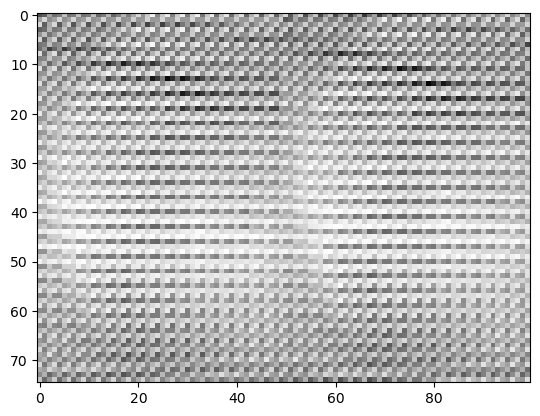

In [6]:
from sklearn.model_selection import train_test_split

# Assuming you have already loaded your data and created image_list and image_labels
np_image_list = np.array(image_list, dtype=np.float16) / 255.0
print("[INFO] Splitting data into train and test sets")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state=42)
print(image_labels)
#x_train = x_train.reshape(4915200, 64)
#x_test = x_test.reshape(4915200, 64)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#x_train /= 255
#x_test /= 255

#y_train = keras.utils.to_categorical(y_train, n_classes)
#y_test = keras.utils.to_categorical(y_test, n_classes)

print("Label:",y_train[255:256])
plt.imshow(x_train[255:256].reshape(75,100), cmap='gray')
plt.show()

In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Example input data
input_shape = (50, 50, 3)  # Assuming 50x50 RGB images
x_train = np.random.rand(100, *input_shape)  # Example training data
y_train = np.random.randint(0, 2, size=(100,))  # Example training labels

# Define your model
model = Sequential()

# Add Conv2D layer
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))

# Add MaxPooling2D layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Add Flatten layer
model.add(Flatten())

# Add Dense layer
model.add(Dense(64, activation='relu'))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
3/3 [==============================] - 3s 385ms/step - loss: 1.7410 - accuracy: 0.4500 - val_loss: 0.7343 - val_accuracy: 0.6000
Epoch 2/10
3/3 [==============================] - 0s 87ms/step - loss: 0.8057 - accuracy: 0.5500 - val_loss: 0.7167 - val_accuracy: 0.6000
Epoch 3/10
3/3 [==============================] - 0s 92ms/step - loss: 0.7471 - accuracy: 0.5500 - val_loss: 0.6726 - val_accuracy: 0.6000
Epoch 4/10
3/3 [==============================] - 0s 92ms/step - loss: 0.6850 - accuracy: 0.5500 - val_loss: 0.6819 - val_accuracy: 0.6000
Epoch 5/10
3/3 [==============================] - 0s 91ms/step - loss: 0.6784 - accuracy: 0.5625 - val_loss: 0.6921 - val_accuracy: 0.4500
Epoch 6/10
3/3 [==============================] - 0s 114ms/step - loss: 0.6804 - accuracy: 0.8750 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 0s 112ms/step - loss: 0.6767 - accuracy: 0.8875 - val_loss: 0.6871 - val_accuracy: 0.6000
Epoch 8/10
3/3 [========

In [14]:
'''from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define your model
model = Sequential([
    Dense(64, activation='relu', input_shape=(50, 50, depth)),
    Flatten(),
    Dense(5, activation='softmax')  # Assuming 5 classes for example
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.optimizers import Adam

# Define your learning rate and number of epochs
INIT_LR = 0.001
EPOCHS = 10

# Define your optimizer
opt = Adam(learning_rate=INIT_LR)

# Compile your model
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

"""opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="categorical_crossentropy", optimizer=RMSprop(),metrics=["accuracy"])
# train the network
print("[INFO] training network...")
"""


#history = model.fit_generator(
#    aug.flow(x_train, y_train, batch_size=BS),
#    validation_data=(x_test, y_test),
#    steps_per_epoch=len(x_train) // BS,
#    epochs=EPOCHS, verbose=1
#    )
history = model.fit(x_train,y_train,validation_split=0.25,
                    batch_size=BS,
                    epochs=EPOCHS,validation_data=(x_test, y_test),
                    verbose=1)'''
num_classes = 5 
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.25,
                    batch_size=BS, epochs=EPOCHS,
                    validation_data=(x_test, y_test),
                    verbose=1)



Epoch 1/10


ValueError: in user code:

    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\user\anaconda3\Lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5, 5, 5, 5, 5) and (None, 5) are incompatible


In [ ]:
import matplotlib.pylab as plt
import numpy as np

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.savefig('graph_accuracy_graph.png',dpi=400)
plt.show()




In [ ]:
history_dict = history.history
print(history_dict.keys())

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
prediction = model.predict(x_test[23:24])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

In [ ]:
plt.imshow(x_test[23:24].reshape(100,75),cmap='gray')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "blue")
    fig.tight_layout()
    return ax

In [ ]:
np.set_printoptions(precision=2)

In [ ]:
prediction = model.predict(x_test, batch_size=10, verbose=0)
rounded_prediction = model.predict(x_test, batch_size=10, verbose=0)
#y_pred=np.argmax(y_pred, axis=1)

In [ ]:
for i in rounded_prediction:
    print(i)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(x_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
 
#                        (or)

# y_pred = model.predict(x_test)
# print(y_pred)

# p=model.predict(x_test) # to predict probability
# p=np.argmax(predict,axis=1)
# target_names = ['class 0(BIKES)', 'class 1(CARS)', 'class 2(HORSES)']
print(label_binarizer.classes_)
target_names = label_binarizer.classes_
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


In [ ]:
plot_confusion_matrix(np.argmax(y_test,axis=1), y_pred, classes=label_binarizer.classes_, normalize=True,
                      title='Normalized confusion matrix')

In [ ]:
plot_confusion_matrix(np.argmax(y_test,axis=1), y_pred, classes=label_binarizer.classes_,
                      title='Confusion matrix, without normalization')


In [ ]:
model.save('grape.h5')

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('grape.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("model_grape.tflite", "wb").write(tflite_model)